# C47: Funciones de distribución de probabilidades

## Distribución Uniforme

La __distribución uniforme__ se encarga de generar números aleatorios que son equiprobables entre ellos, todos tienen la misma probabilidad de ocurrencia.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1; #Límite superior
b = 100; #Límite inferior
n = 1000000; #Número de muestras

# El límite superior debe ser menor al inferior.
# uniform(límite superior, límite inferior, número de muestras);

data = np.random.uniform(a, b, n);

(array([ 99698.,  99622.,  99895.,  99877.,  99759.,  99847., 100560.,
        100786., 100183.,  99773.]),
 array([ 1.00002543, 10.90001877, 20.80001211, 30.70000545, 40.59999879,
        50.49999213, 60.39998547, 70.29997881, 80.19997215, 90.09996549,
        99.99995883]),
 <a list of 10 Patch objects>)

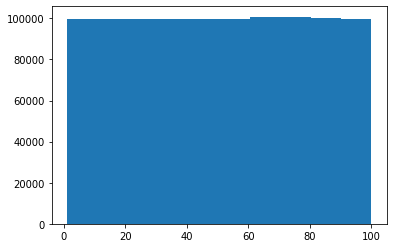

In [3]:
# %matplotlib inline combina texto e imagen en la misma celda.
%matplotlib inline

plt.hist(data)

El histograma se encuentra dividido en 10 dimensiones, por lo que caer en cualquiera de ellas se tendría una probabilidad de 1/10 si tomamos cualquiera de las muestras entre 1 millón. Esto nos lleva a que cada grupo de datos tendrá aproximadamente 100 mil muestras y al haber 10, se obtiene 1 millón. Es por esto que el histograma parece nivelado en su límite superior. A medida que la cantidad de muestras (*n*) aumenta, se podrá apreciar una distribución uniforme.

# C48: La distribución normal o Campana de Gauss

In [15]:
#Existe una función en Python que permite generar números con una distribución normal

# La función randn genera una distribución normal estandar con media = 0 y desviación típica = 1
data = np.random.randn(1000000);

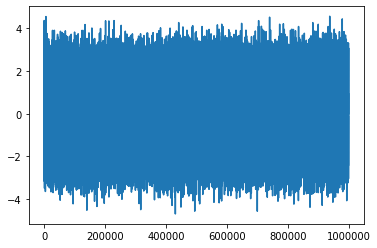

In [17]:
x = range(1,1000001);
#plt.plot(x, y);
plt.plot(x, data)

(array([8.00000e+01, 2.08300e+03, 2.52710e+04, 1.33282e+05, 3.13596e+05,
        3.31701e+05, 1.57289e+05, 3.34350e+04, 3.12700e+03, 1.36000e+02]),
 array([-4.69767851, -3.77109773, -2.84451696, -1.91793618, -0.99135541,
        -0.06477463,  0.86180614,  1.78838692,  2.71496769,  3.64154847,
         4.56812924]),
 <a list of 10 Patch objects>)

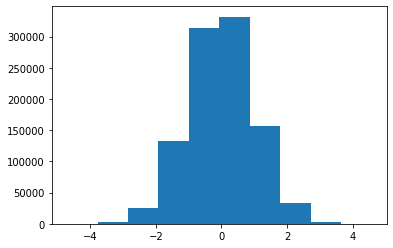

In [18]:
%matplotlib inline
plt.hist(data)

### Función de distribución acumulada

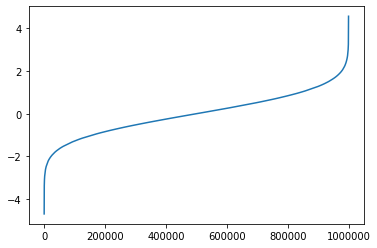

In [19]:
plt.plot(x, sorted(data))

(array([7.000e+00, 9.100e+01, 5.310e+02, 1.789e+03, 3.074e+03, 2.825e+03,
        1.322e+03, 3.220e+02, 3.700e+01, 2.000e+00]),
 array([-4.52467449, -2.44930511, -0.37393573,  1.70143365,  3.77680303,
         5.85217241,  7.92754179, 10.00291117, 12.07828055, 14.15364993,
        16.22901931]),
 <a list of 10 Patch objects>)

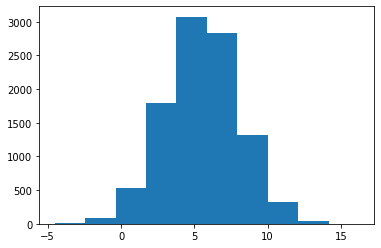

In [21]:
#Si no queremos la media y desviación estandar que nos entrega la función randn podemos hacer lo siguiente

#Media = mu
#Desviación estandar = sd (standar deviation)
#Distribución normal = Z (el )
mu = 5.5;
sd = 2.5;
Z = np.random.randn(10000);
data = mu + sd * Z;  #Z = (X - mu) /sd ->N(0,1), X = mu + sd * Z -> Teorema Central del Límite
plt.hist(data)

In [22]:
#Al método randn en vez de especificarle la cantidad de muestras que se esperan obtener, se le pueden especificar un array
#... de números para obtener diferentes arrays, diferentes versiones de la normal.

data = np.random.randn(2,4) #Dos filas, cuatro columnas.
data

array([[ 0.3257231 ,  0.01988946,  1.04294719,  0.23854081],
       [ 0.56704408, -0.83015237,  0.4483578 ,  0.56423481]])

# C49: La simulación de Monte Carlo para estimar el número pi

In [1]:
#Librería propia para mostrar imágenes
from PIL import Image

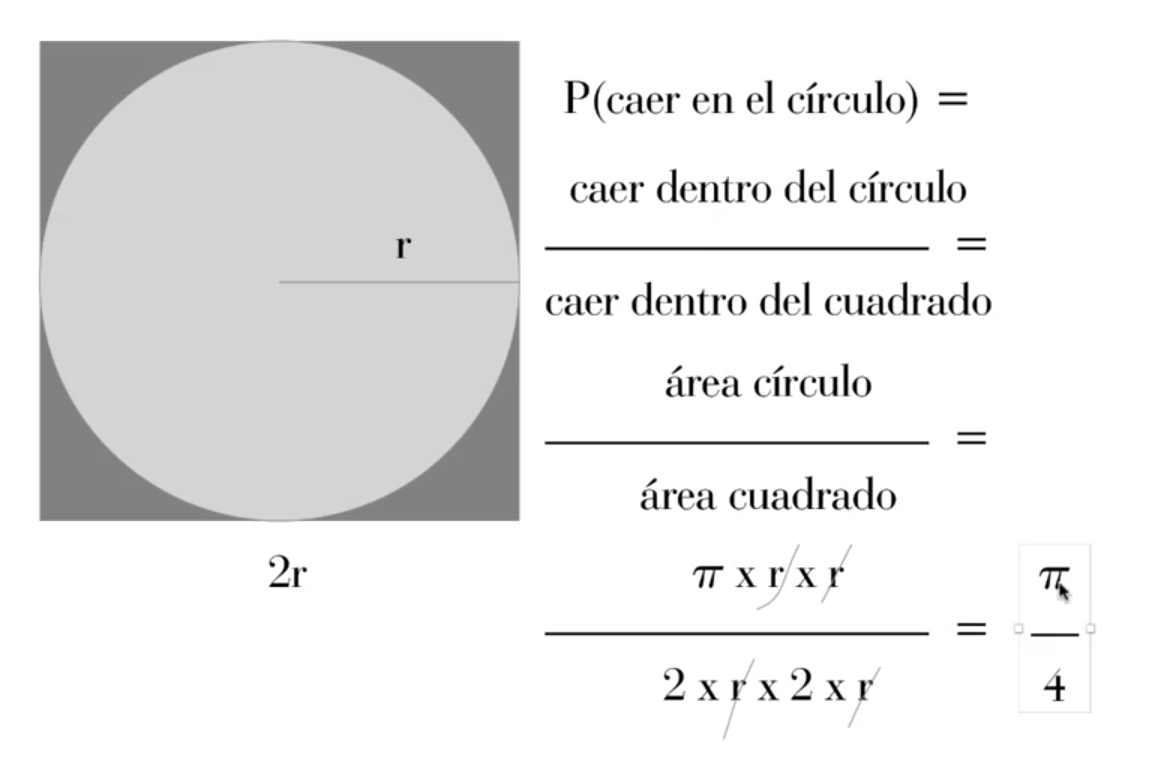

In [5]:
imagen = Image.open("C:/Users/Nicolas Duran/Documents/Universidad/Tesis/Curso Machine Learning/CursoML/Foto.png")
imagen

Generamos dos números aleatorios x e y entre 0 y 1
Calcularemos x*x + y*y
* Si el valor es inferior a 1 -> estamos dentro del círculo
* Si el valor es superior a 1 -> estamos fuera del círculo

Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
Usamos dicha probabilidad para aproximar el valor de pi.

Repetimos el experimento un número suficiente de veces (por ejemplo, 100), para obtener diferentes aproximaciones de pi.

Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de pi.

In [14]:
%matplotlib inline

def pi_montecarlo(n, n_exp):
    pi_avg = 0;
    pi_value_list = [];

    for i in range (n_exp):
        value = 0;
        x = np.random.uniform(0, 1, n).tolist(); #Entre 0 y 1
        y = np.random.uniform(0, 1, n).tolist();
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j]);
            if z <= 1:
                value += 1;
        float_value = float(value);
        pi_value = float_value * 4 / n;
        pi_value_list.append(pi_value);
        pi_avg += pi_value;
    pi = pi_avg / n_exp;
    fig = plt.plot(pi_value_list);
    return (pi, fig);

El valor de pi resultante:  3.1469000000000027


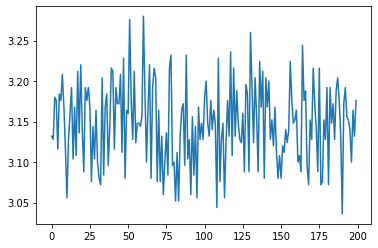

In [16]:
pi, fig = pi_montecarlo(1000, 200);
print("El valor de pi resultante: ", pi);
fig

# C50: Generando Dummy Datasets

Es una lista o un array de números aleatorios de modo que cada uno de ellos obtiene un vector columna que pasará a ser la columna del dataset en forma de diccionarios.

In [21]:
#pd.DataFrame nos permite transformar un diccionario a dataset

n = 1000000;
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }

)

In [22]:
data.head()

,A,B,C
0,-0.097413,0.296371,7.009508
1,0.195802,1.287613,18.565911
2,-0.492504,4.700998,27.009006
3,-1.346754,3.171345,28.265954
4,1.884805,-3.668447,8.028894


In [23]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001648,1.498818,18.497574
std,0.999490,2.500452,7.797537
min,-4.877401,-10.932973,5.000091
25%,-0.674976,-0.190765,11.741879
50%,-0.002414,1.499293,18.499189
75%,0.673021,3.186459,25.251353
max,4.788222,14.139892,31.999989


(array([4.60000e+01, 1.58000e+03, 2.25520e+04, 1.31865e+05, 3.27145e+05,
        3.39264e+05, 1.48292e+05, 2.71900e+04, 2.01200e+03, 5.40000e+01]),
 array([-4.87740106, -3.91083878, -2.94427649, -1.9777142 , -1.01115192,
        -0.04458963,  0.92197266,  1.88853494,  2.85509723,  3.82165952,
         4.7882218 ]),
 <a list of 10 Patch objects>)

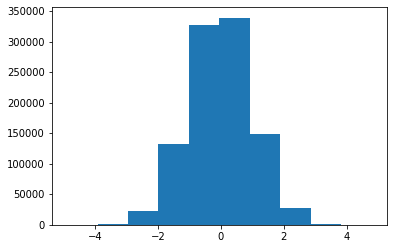

In [25]:
#A: media 0 y desviacion estandar 1; B: media 1.5 y desviacion tipica 2.5; C: media 18,5 y desviacion 8

plt.hist(data["A"])

(array([3.70000e+01, 1.43500e+03, 2.32800e+04, 1.43987e+05, 3.47875e+05,
        3.35128e+05, 1.28003e+05, 1.91050e+04, 1.13200e+03, 1.80000e+01]),
 array([-10.93297327,  -8.42568679,  -5.91840031,  -3.41111383,
         -0.90382735,   1.60345913,   4.11074561,   6.61803209,
          9.12531857,  11.63260505,  14.13989153]),
 <a list of 10 Patch objects>)

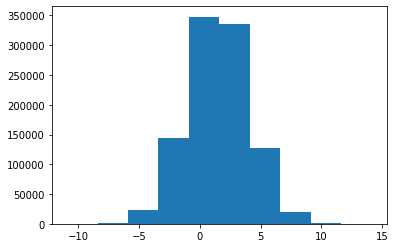

In [26]:
plt.hist(data["B"])

(array([100311.,  99959., 100287.,  99431., 100046.,  99747., 100015.,
        100245.,  99942., 100017.]),
 array([ 5.00009086,  7.70008072, 10.40007057, 13.10006043, 15.80005028,
        18.50004014, 21.20003   , 23.90001985, 26.60000971, 29.29999956,
        31.99998942]),
 <a list of 10 Patch objects>)

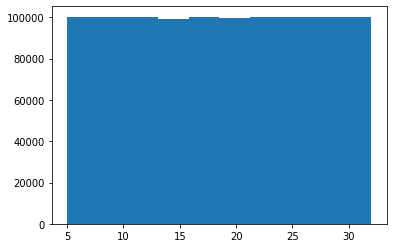

In [27]:
plt.hist(data["C"])

In [29]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt");

In [30]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [31]:
column_names = data.columns.values.tolist()

In [32]:
a = len(column_names)
a

21

In [37]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a) #Hacer que parta el índice en 42 y no 0. Sirve para unir con otro dataframe

)

In [38]:
new_data

,Column Name,A,B
42,State,-0.827461,0.913718
43,Account Length,-1.907580,0.372357
44,Area Code,-0.960866,0.572318
45,Phone,-0.471228,0.622312
46,Int'l Plan,0.192656,0.296397
47,VMail Plan,0.529239,0.263160
48,VMail Message,2.136374,0.224997
49,Day Mins,1.580934,0.664201
50,Day Calls,-0.279993,0.982531
51,Day Charge,-0.007154,0.516378
